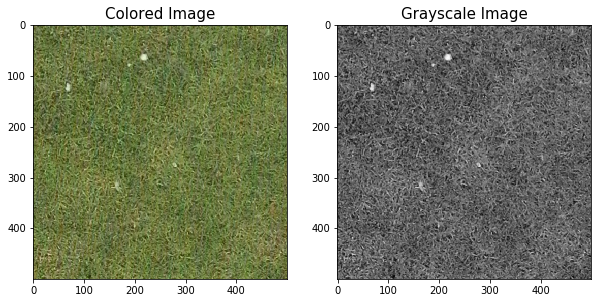

In [1]:
import numpy as np
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from PIL import Image

Image.MAX_IMAGE_PIXELS = 1000000000

sample = imread('/home/martin/container/hail/hail_orthomosaic_coco/odm_orthophoto/tiles/images/odm_orth_9_28.png')
sample_g = rgb2gray(sample)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

In [30]:
import cv2
import os
import numpy as np

#cv2.CV_IO_MAX_IMAGE_PIXELS=37000000

im_path = '/home/martin/container/hail/hail_orthomosaic_coco/odm_orthophoto/tiles/images/'
sa_path = '/home/martin/container/hail/blobs/'
d5_path = '/home/martin/container/hail/blobs/D5/'

all_dots = []

for filename in os.listdir(im_path):
    #print(filename)
    if filename.endswith(".png"):
        image = cv2.imread(im_path+filename)
        blur = cv2.medianBlur(image, 5)
        gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray,180,255, cv2.THRESH_BINARY)[1]

        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]

        #min_area = 78.54 # grösser 1 cm durchmesser (rund)
        #min_area = 314.16 # grösser 2 cm durchmesser (rund)
        #min_area = 706.86 # grösser 3 cm durchmesser (rund)
        #min_area = 1256.64 # grösser 3 cm durchmesser (rund)
        min_area = 1963.50 # grösser 3 cm durchmesser (rund)
        
        white_dots = []
        for c in cnts:
            area = cv2.contourArea(c)
            if area > min_area:
                cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
                print(filename)
                white_dots.append(c)
                cv2.imwrite(d5_path+'d5_'+filename, image)

        #print(len(white_dots))
        all_dots.append(len(white_dots))
        cv2.imwrite(sa_path+'tresh_'+filename, thresh)
        
    continue

print('Number of detected hailstones: ', np.sum(all_dots))

odm_orth_0_26.png
odm_orth_0_26.png
odm_orth_3_22.png
odm_orth_9_16.png
odm_orth_6_26.png
odm_orth_8_29.png
odm_orth_8_30.png
odm_orth_18_26.png
odm_orth_7_30.png
odm_orth_10_1.png
odm_orth_3_3.png
odm_orth_1_27.png
odm_orth_1_27.png
odm_orth_1_27.png
odm_orth_2_28.png
odm_orth_0_5.png
odm_orth_0_5.png
Number of detected hailstones:  17


In [21]:
import numpy as np
np.sum(all_dots)

6281

In [3]:
image = cv2.imread('/container/hail/hail_orthomosaic_coco/odm/Processing_20210723_HR/odm_orthophoto/odm_orthophoto.png')

In [1]:
# Standard imports
import cv2
import numpy as np

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;

# Filter by Area.
params.filterByArea = True
params.minArea = 40

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.6

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5

# Filter by Inertia
#params.filterByInertia = True
#params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)

In [2]:
# Read image
im = cv2.imread("/home/martin/container/hail/hail_orthomosaic_coco/odm_orthophoto/tiles/images/odm_orth_24_20.png", cv2.IMREAD_GRAYSCALE)

# Set up the detector with default parameters.
#detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

32